#### Predictive Maintenance

In [67]:
#import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# Load the dataset
df = pd.read_csv(r"C:\Users\MILAN\Desktop\project\Data_science_thesis\data_folder\ai4i2020.csv")

In [69]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [70]:
df.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,0,0,0,0,0


In [71]:
# Check data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [72]:
# Check for missing values
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

#### Visualization

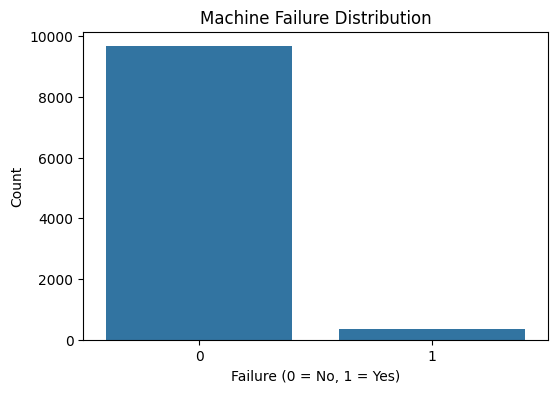

In [73]:
# Target Variable Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Machine failure')
plt.title('Machine Failure Distribution')
plt.xlabel('Failure (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

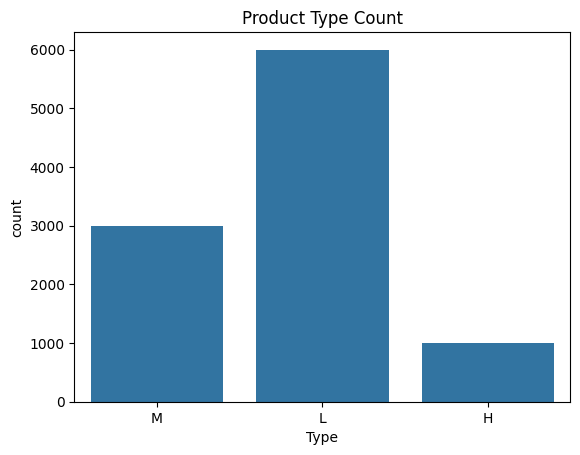

In [74]:
# Product Type Count
sns.countplot(x='Type', data=df)
plt.title("Product Type Count")
plt.show()

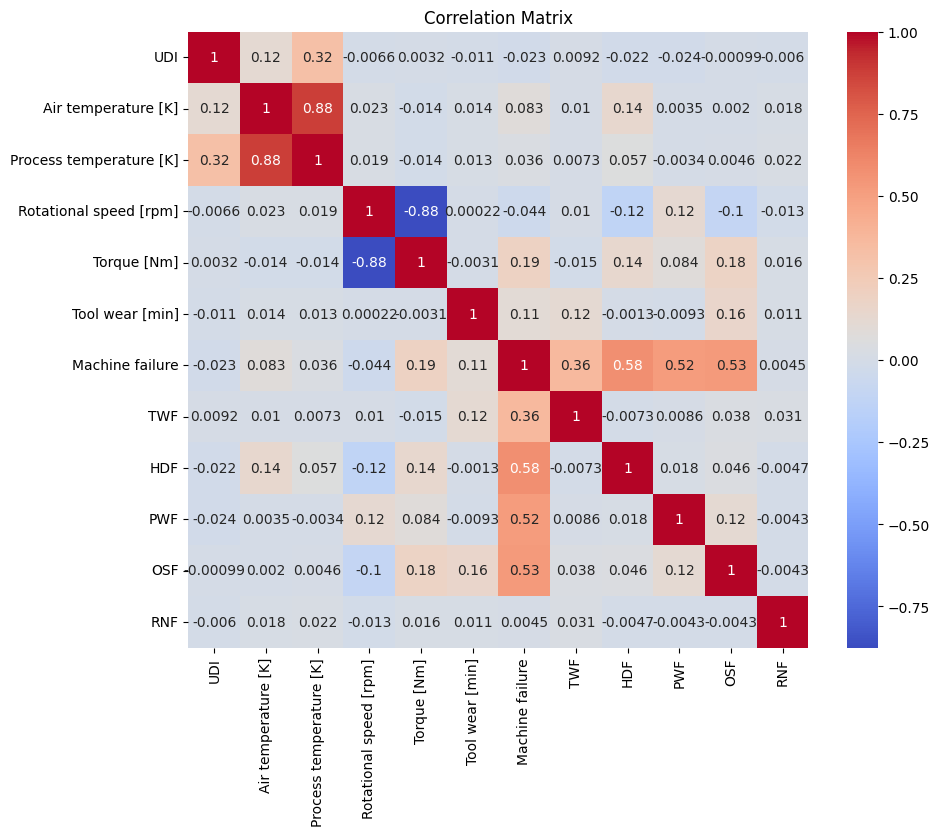

In [75]:
# Feature correlations
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

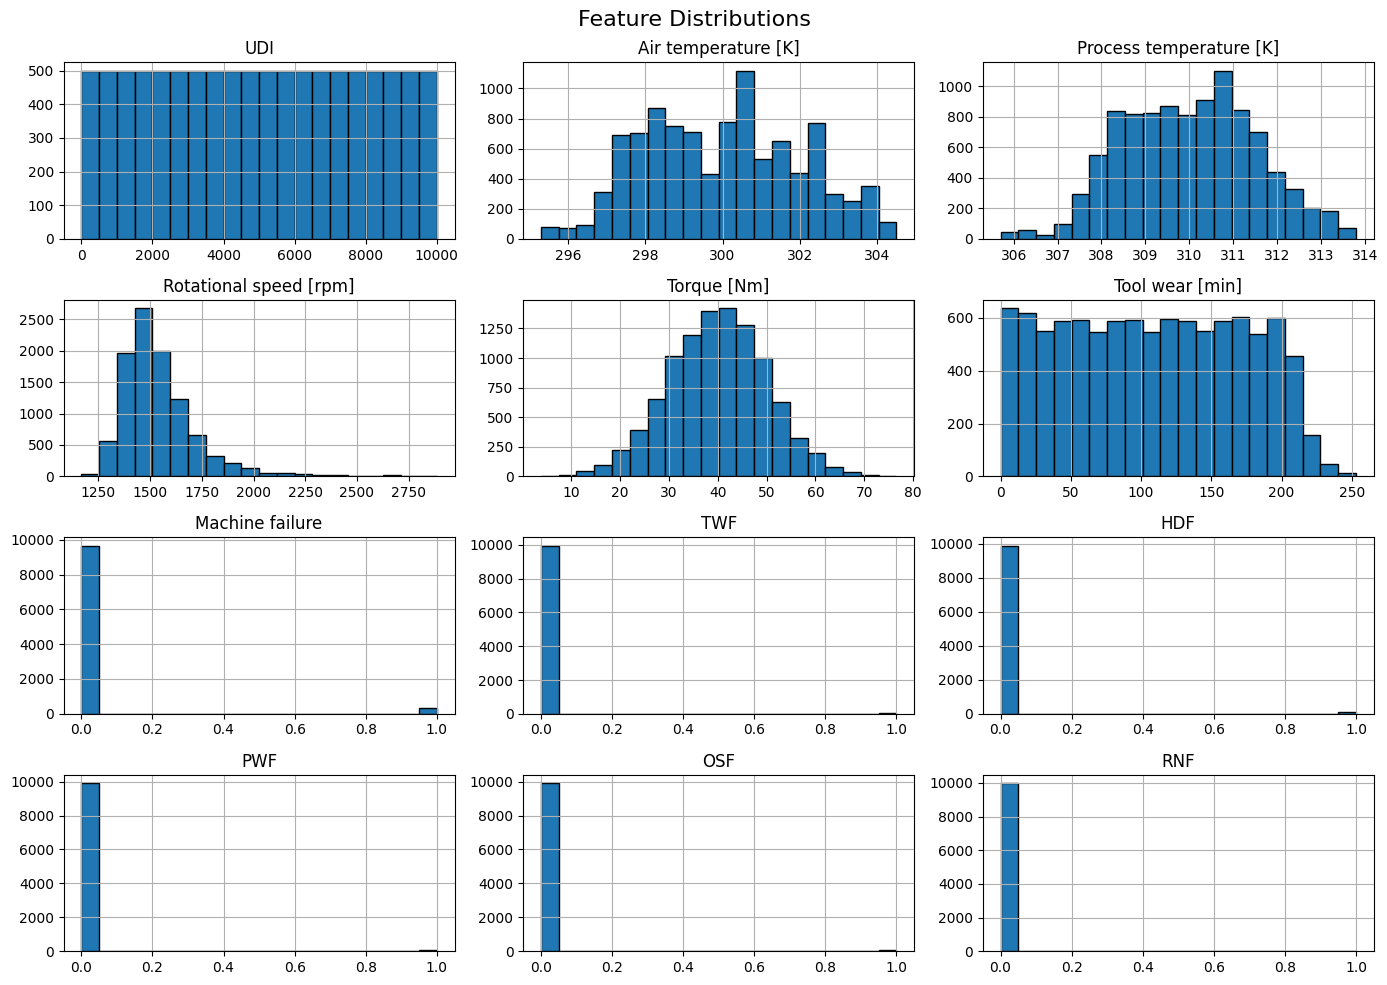

In [76]:
# Histogram for numerical features
df.hist(figsize=(14, 10), bins=20, edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()

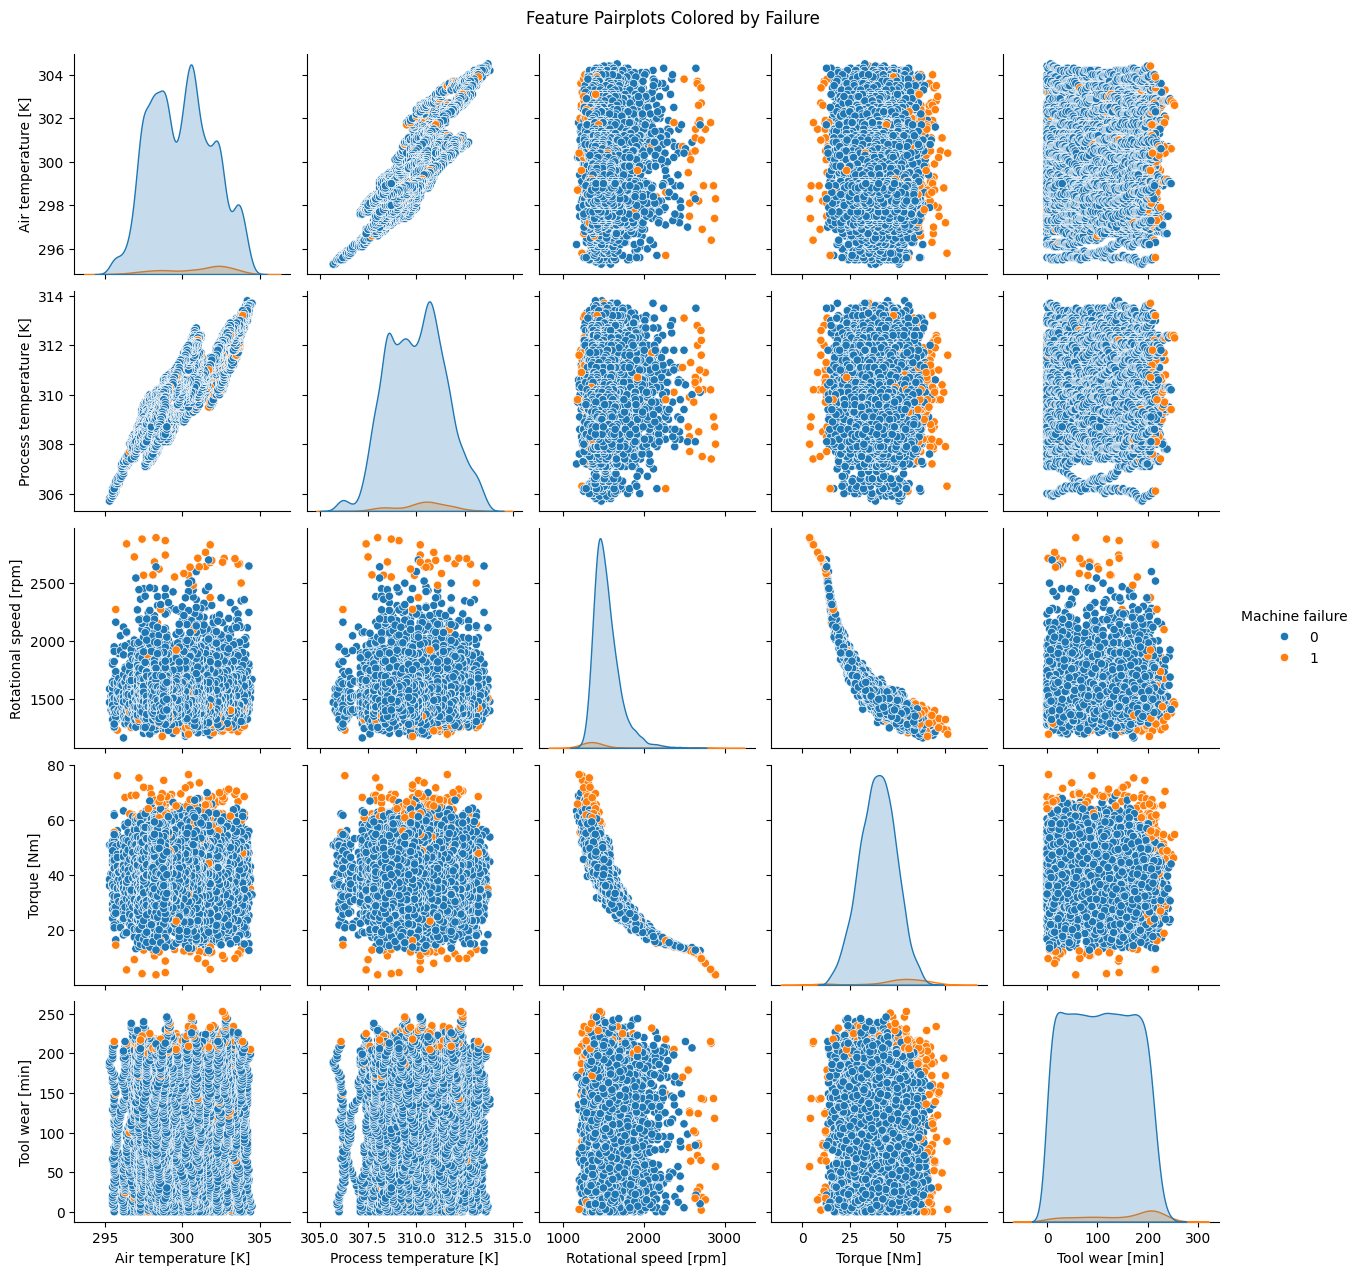

In [77]:
# pairplot for selected features
sample_cols = ['Air temperature [K]', 'Process temperature [K]', 
               'Rotational speed [rpm]', 'Torque [Nm]', 
               'Tool wear [min]', 'Machine failure']

sns.pairplot(df[sample_cols], hue='Machine failure', diag_kind='kde')
plt.suptitle("Feature Pairplots Colored by Failure", y=1.02)
plt.show()

Aim:

Aim 1: To improve the overall operational reliability of machinery and equipment.

Aim 2: To reduce maintenance costs associated with reactive and preventive strategies.

Aim 3: To optimize the utilization of resources, including manpower and spare parts.

Aim 4: To extend the lifespan of machinery and equipment.

Aim 5: To enhance model trust and interpretability through the integration of Explainable AI techniques into predictive maintenance models.


OBJECTIVES:

RO1: Conduct a comprehensive review of existing predictive maintenance models and benchmark 
against industry best practices.

RO2: Collect relevant real-time data from machinery and preprocess it for analysis.

RO3: Develop a robust predictive maintenance model using machine learning algorithms.

RO4: Integrate and contrast Explainable AI techniques (e.g., SHAP, LIME) to understand and visualize model decision-making in predicting machine failure.


RESEARCH QUESTIONS:

RQ1: What specific features and sensor parameters have the greatest impact on equipment failure prediction, and how can Explainable AI be leveraged to identify these influential variables?

RQ2: How can Explainable AI and machine learning techniques be combined to increase the accuracy and interpretability of failure prediction in industrial maintenance?

RQ3: How do different product quality variants (L, M, H) affect the performance and explainability of predictive maintenance models in machines?

RQ4: "How can the outputs of Explainable AI methods (e.g., SHAP, LIME) be used to support failure diagnosis and decision-making in milling machine predictive maintenance systems?"

RQ5: How do the various Explainable AI methods compare in terms of their effectiveness, scalability, and usability for real-time maintenance decision support in an industrial setting?

### Model Implementation

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [79]:
print(df.columns)

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')


RQ1: What specific features and sensor parameters have the greatest impact on equipment failure prediction, and how can Explainable AI be leveraged to identify these influential variables?

In [80]:
# Encode Categorical Columns
df['Type'] = df['Type'].map({'L': 0, 'M': 1, 'H': 2})  # Encode Type
df['Product ID'] = df['Product ID'].astype('category').cat.codes

In [81]:
# Prepare Features and Target
X = df.drop(['UDI', 'Machine failure'], axis=1)
y = df['Machine failure']

##### Train Random Forest model

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000



##### Shap for Explainability

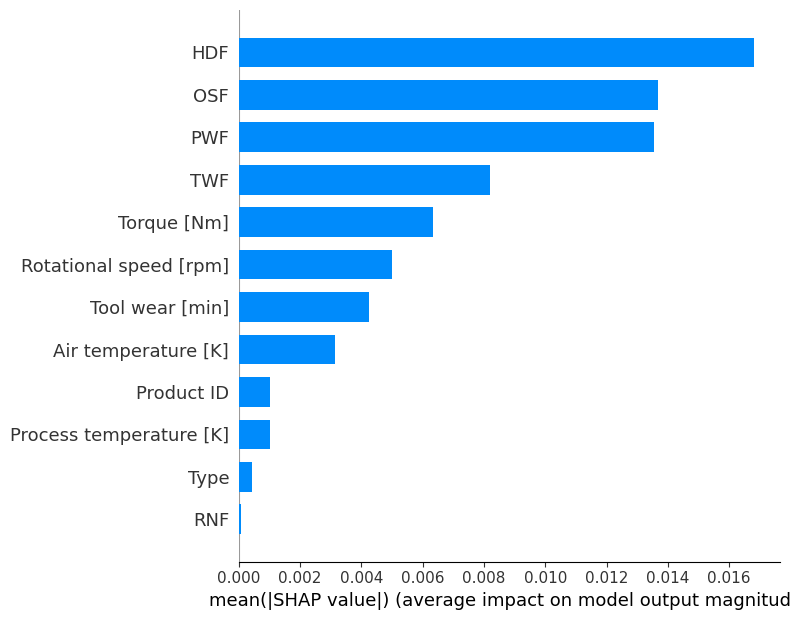

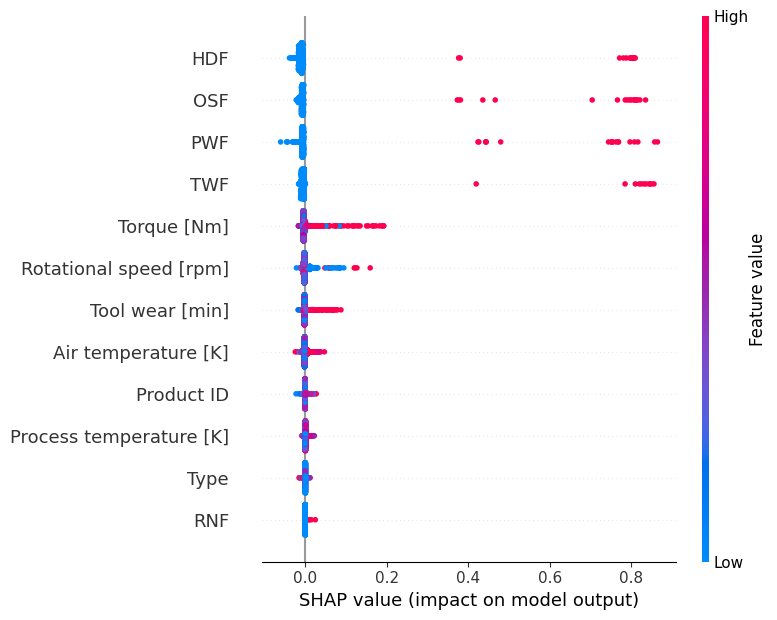

In [83]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Example: Class 1 (second class)
shap_values_class1 = shap_values[:, :, 1]

shap.summary_plot(shap_values_class1, X_test, plot_type="bar")
shap.summary_plot(shap_values_class1, X_test)

RQ2: How can Explainable AI and machine learning techniques be combined to increase the accuracy and interpretability of failure prediction in industrial maintenance?

In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import shap

In [85]:
features = ['Type', 'Air temperature [K]', 'Process temperature [K]',
            'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
            'TWF', 'HDF', 'PWF', 'OSF', 'RNF']
target = 'Machine failure'

In [86]:
# --- Prepare feature matrix and target vector ---
X = df[features].copy()
y = df[target]

In [87]:
# Encode Categorical Columns
df['Type'] = df['Type'].map({'L': 0, 'M': 1, 'H': 2})  # Encode Type
df['Product ID'] = df['Product ID'].astype('category').cat.codes

In [88]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [89]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [90]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [91]:
# --- Evaluate baseline ---
y_pred = model.predict(X_test_scaled)
print("Baseline accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Baseline accuracy: 0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1932
           1       1.00      0.97      0.99        68

    accuracy                           1.00      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000



In [92]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_scaled)

In [93]:
shap_values_class1 = shap_values[:, :, 1]

In [94]:
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=features)

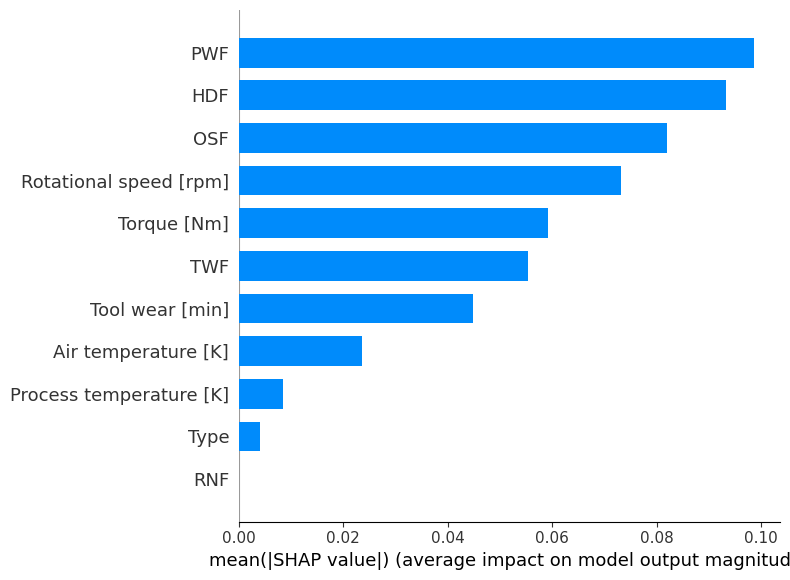

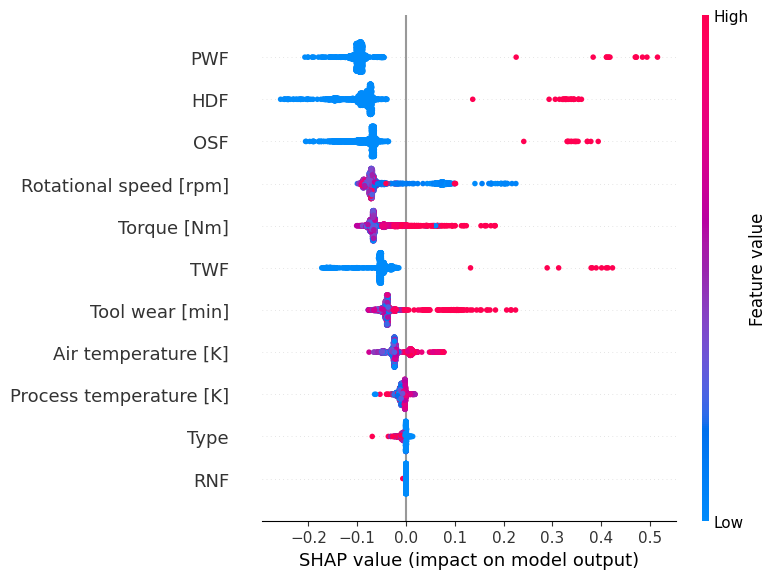

In [95]:
shap.summary_plot(shap_values_class1, X_test_scaled_df, plot_type="bar")
shap.summary_plot(shap_values_class1, X_test_scaled_df)

In [96]:
mean_shap = np.abs(shap_values_class1).mean(axis=0)
top_n = 7
top_indices = np.argsort(mean_shap)[-top_n:]
top_features = [features[i] for i in top_indices]
print("Top features by SHAP:", top_features)

Top features by SHAP: ['Tool wear [min]', 'TWF', 'Torque [Nm]', 'Rotational speed [rpm]', 'OSF', 'HDF', 'PWF']


In [97]:
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

In [98]:
# Scale top features
scaler_top = StandardScaler()
X_train_top_scaled = scaler_top.fit_transform(X_train_top)
X_test_top_scaled = scaler_top.transform(X_test_top)

In [99]:
# Train Random Forest again with class weights
model_top = RandomForestClassifier(random_state=42, class_weight='balanced')
model_top.fit(X_train_top_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [100]:
# Evaluate refined model
y_pred_top = model_top.predict(X_test_top_scaled)
print("Accuracy after SHAP feature selection:", accuracy_score(y_test, y_pred_top))
print(classification_report(y_test, y_pred_top))

Accuracy after SHAP feature selection: 0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1932
           1       1.00      0.97      0.99        68

    accuracy                           1.00      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000



In [101]:
# SHAP for refined model
explainer_top = shap.TreeExplainer(model_top)
shap_values_top = explainer_top.shap_values(X_test_top_scaled)
shap_values_top_class1 = shap_values_top[:, :, 1]

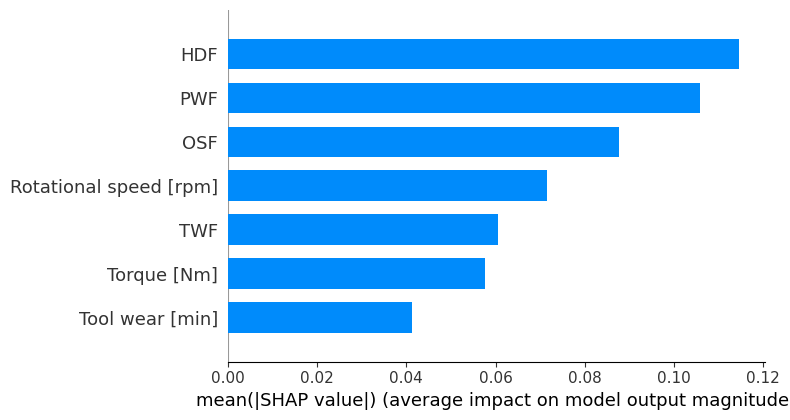

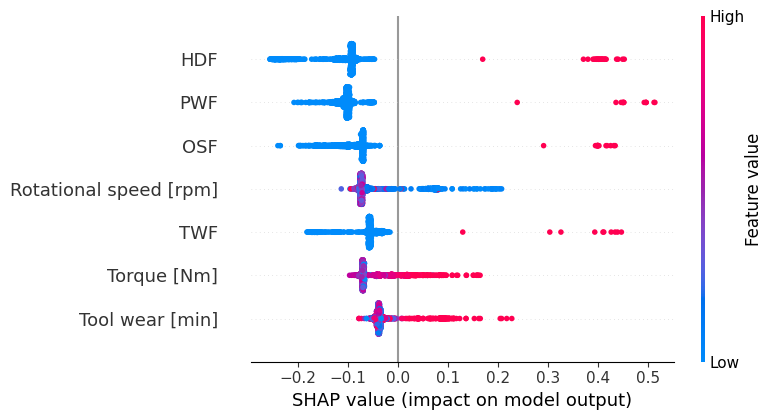

In [102]:
X_test_top_scaled_df = pd.DataFrame(X_test_top_scaled, columns=top_features)
shap.summary_plot(shap_values_top_class1, X_test_top_scaled_df, plot_type="bar")
shap.summary_plot(shap_values_top_class1, X_test_top_scaled_df)

RQ3: How do different product quality variants (L, M, H) affect the performance and explainability of predictive maintenance models in machines?

In [103]:
print(df.columns)

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')


In [104]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import shap
import matplotlib.pyplot as plt

In [105]:
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 
            'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']
target = 'Machine failure'

In [106]:
variant_map={'L': 0, 'M': 1, 'H': 2}

# Loop through each quality variant
for variant in ['L', 'M', 'H']:
    print(f"\n=== Variant: {variant} ===")
    
    # Subset the data
    df_variant = df[df['Type'] == variant_map[variant]]
    X = df_variant[features]
    y = df_variant[target]
    
    print(f"Variant {variant} has {len(df_variant)} rows")


=== Variant: L ===
Variant L has 0 rows

=== Variant: M ===
Variant M has 0 rows

=== Variant: H ===
Variant H has 0 rows


In [107]:
# Check number of samples
if len(X) < 10:
    print("Too few samples to split.")
else:
    # Check if target has at least two classes
    if y.nunique() < 2:
        print("Only one class present in target, can't split properly.")
    else:
        # Safe to split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Too few samples to split.


In [108]:
# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [109]:
# Performance
print("Classification Report:")
print(classification_report(y_test, preds))
    
# Explainability
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1932
           1       1.00      0.97      0.99        68

    accuracy                           1.00      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000



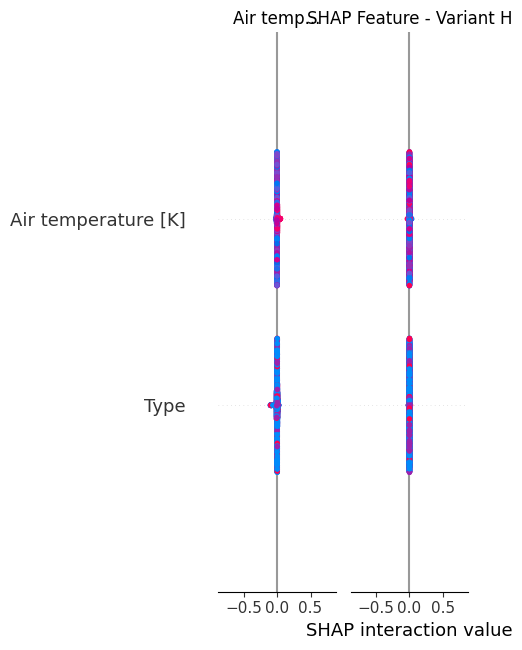

In [110]:
if isinstance(shap_values, list) and len(shap_values) == 2:
    shap_vals_to_plot = shap_values[1]  # or shap_values[0], based on class of interest
else:
    shap_vals_to_plot = shap_values
shap.summary_plot(shap_vals_to_plot, X_test, plot_type="bar", show=False)

plt.title(f"SHAP Feature - Variant {variant}")
plt.tight_layout()
plt.savefig(f"shap_variant_{variant}.png")
plt.show()

RQ4: "How can the outputs of Explainable AI methods (e.g., SHAP, LIME) be used to support failure diagnosis and decision-making in milling machine predictive maintenance systems?"

In [111]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import shap
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]',
            'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']
target = 'Machine failure'

In [113]:
X = df[features]
y = df[target]

# Train Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [114]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000



In [115]:
# 🔍 SHAP Explanation
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

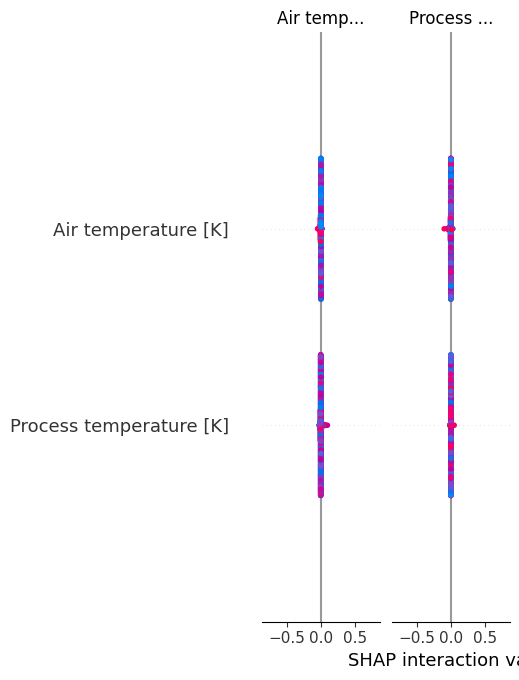

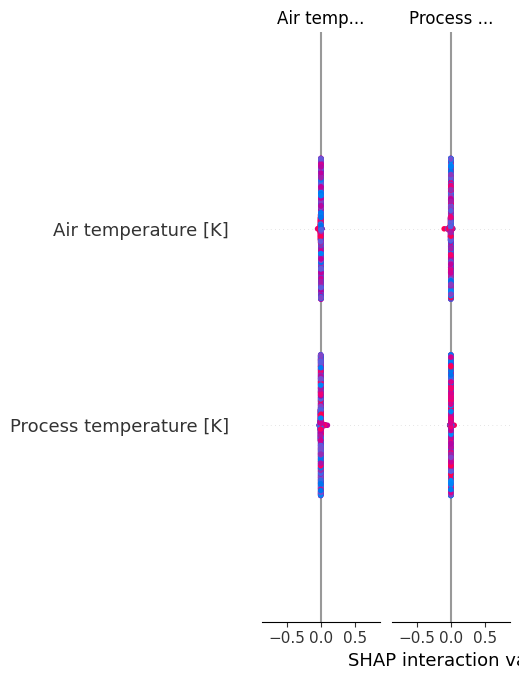

In [116]:
# Global feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")  # class '1' is failure
shap.summary_plot(shap_values, X_test)

<class 'numpy.ndarray'>
(2000, 10, 2)


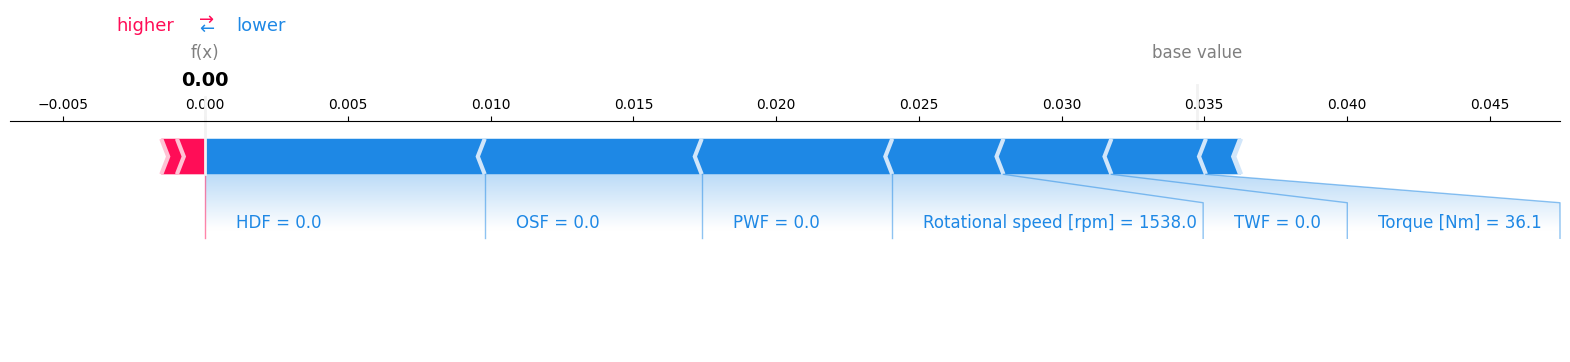

c:\Users\MILAN\Desktop\project\Udemy_course\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [117]:
# Local interpretation for a single sample
sample_idx = 0

print(type(shap_values))
print(np.shape(shap_values))
shap.force_plot(
    explainer.expected_value[1],                  # expected value for class 1 (failure)
    shap_values[:, :, 1][sample_idx],             # SHAP values for sample idx and class 1
    X_test.iloc[sample_idx], 
    matplotlib=True
)

# 🍋 LIME Explanation
lime_explainer = LimeTabularExplainer(X_train.values,
                                      feature_names=features,
                                      class_names=['No Failure', 'Failure'],
                                      discretize_continuous=True)

exp = lime_explainer.explain_instance(X_test.iloc[sample_idx].values, model.predict_proba, num_features=10)
exp.show_in_notebook()

RQ5: How do the various Explainable AI methods compare in terms of their effectiveness, scalability, and usability for real-time maintenance decision support in an industrial setting?

In [118]:
from sklearn.inspection import permutation_importance
import time
import lime

In [119]:
xai_results = []

# --- SHAP ---
start = time.time()
explainer_shap = shap.TreeExplainer(model)
shap_vals = explainer_shap.shap_values(X_test)
elapsed_shap = time.time() - start
shap_importance = np.abs(shap_vals[1]).mean(axis=0)
top_shap_features = [features[i] for i in np.argsort(shap_importance)[-5:]]

xai_results.append({
    "method": "SHAP",
    "runtime_sec": elapsed_shap,
    "top_features": top_shap_features
})

In [120]:
# --- LIME --- with NumPy input to avoid pandas FutureWarning
start = time.time()

lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,                      # ← use NumPy
    feature_names=features,
    class_names=['No Failure', 'Failure'],
    mode='classification'
)

lime_exp = lime_explainer.explain_instance(
    data_row=X_test.iloc[0].values,                    # ← use NumPy here too
    predict_fn=model.predict_proba,
    num_features=6
)

elapsed_lime = time.time() - start
lime_features = [f[0] for f in lime_exp.as_list()]

xai_results.append({
    "method": "LIME",
    "runtime_sec": elapsed_lime,
    "top_features": lime_features
})

c:\Users\MILAN\Desktop\project\Udemy_course\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [121]:
# --- Permutation Importance ---
start = time.time()
perm = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
elapsed_perm = time.time() - start
perm_importance = dict(zip(features, perm.importances_mean))
sorted_perm = dict(sorted(perm_importance.items(), key=lambda x: x[1], reverse=True))
top_perm = list(sorted_perm.keys())[:5]

xai_results.append({
    "method": "Permutation Importance",
    "runtime_sec": elapsed_perm,
    "top_features": top_perm
})


=== XAI Comparison Results ===
                   method  runtime_sec  \
0                    SHAP     1.812681   
1                    LIME     0.165503   
2  Permutation Importance     1.385628   

                                        top_features  
0     [Air temperature [K], Process temperature [K]]  
1  [PWF <= 0.00, OSF <= 0.00, TWF <= 0.00, HDF <=...  
2          [PWF, HDF, OSF, TWF, Air temperature [K]]  


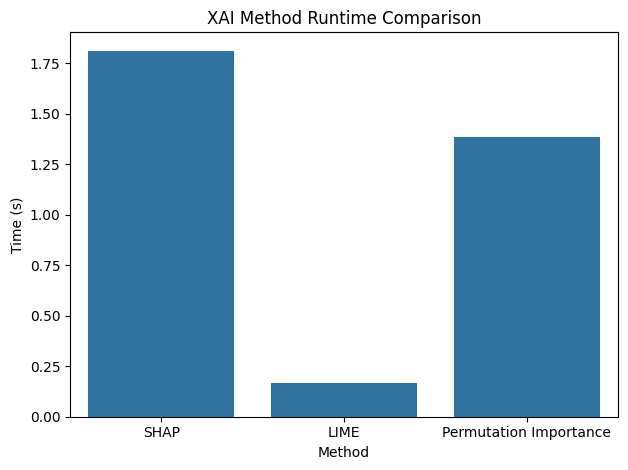

In [122]:
# Display comparison
results_df = pd.DataFrame(xai_results)
print("\n=== XAI Comparison Results ===")
print(results_df)

# Plot runtime
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=results_df, x='method', y='runtime_sec')
plt.title("XAI Method Runtime Comparison")
plt.ylabel("Time (s)")
plt.xlabel("Method")
plt.tight_layout()
plt.show()